<a href="https://colab.research.google.com/github/vkunal1996/Airport-Reviews-Analysis/blob/master/Airline_Quality_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Quality Service Analysis**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 21.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1tmzZKQKEvxt61TxjHchFfJkpqklVgdzP'
fluff,id=link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airline.csv')  
airline_data = pd.read_csv('airline.csv')

In [6]:
airline_data.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1


# **Analysing the DataSet**

In [7]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.04
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.07
route                            0.94
overall_rating                   0.11
seat_comfort_rating              0.19
cabin_staff_rating               0.19
food_beverages_rating            0.20
inflight_entertainment_rating    0.25
ground_service_rating            0.95
wifi_connectivity_rating         0.99
value_money_rating               0.04
recommended                      0.00
dtype: float64

In [0]:
airline_data=airline_data[airline_data['overall_rating'].notnull()]

In [9]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.02
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.05
route                            0.94
overall_rating                   0.00
seat_comfort_rating              0.17
cabin_staff_rating               0.17
food_beverages_rating            0.18
inflight_entertainment_rating    0.23
ground_service_rating            0.94
wifi_connectivity_rating         0.98
value_money_rating               0.03
recommended                      0.00
dtype: float64

# **Calcluating Total Reviews to Each airline**

In [10]:

airline_names=airline_data.airline_name.unique()
print('Total airlines Considered for Analysis : ',len(airline_names))
total_reviews_each_airline=[]
for i in airline_names:
  temp=airline_data[airline_data.airline_name==i]
  total_reviews_each_airline.append(len(temp))
result=list(zip(airline_names,total_reviews_each_airline))
print('Total Reviews Analysed : ',sum(total_reviews_each_airline))

Total airlines Considered for Analysis :  357
Total Reviews Analysed :  36861


In [11]:
df=pd.DataFrame(result,columns=['Airline_Name','Total_Reviews'])
df=df.sort_values(by='Total_Reviews',ascending=False)
df.head()

,Airline_Name,Total_Reviews
295,spirit-airlines,966
97,british-airways,896
333,united-airlines,839
20,air-canada-rouge,715
138,emirates,690


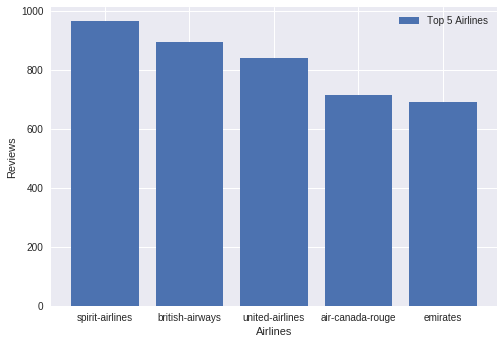

In [12]:
plt.style.use('seaborn')
plt.xlabel('Airlines')
plt.ylabel('Reviews')
plt.bar(df.Airline_Name[:5],df.Total_Reviews[:5],label='Top 5 Airlines')
plt.legend()


# **Finding Polarity of Each Review**

In [0]:
from textblob import TextBlob

In [0]:
result1=[]
num=1
numlist=[]
for review in airline_data.content:
    analysis=TextBlob(review)
    result1.append(analysis.polarity)
    numlist.append(num)
    num=num+1
result1=np.array(result1)


### **Plotting Polarity**

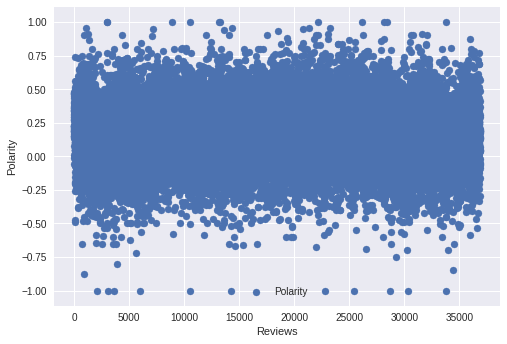

In [17]:
plt.style.use('seaborn')
plt.scatter(numlist,result1,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()

# **Generating Word Cloud**

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=''

for i in airline_data.content:
  text=text+i+' '

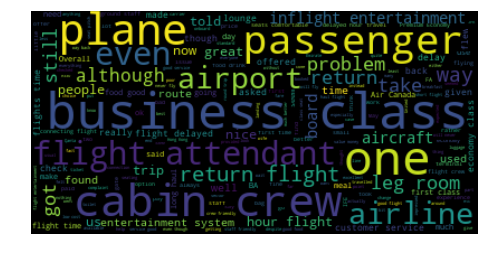

In [27]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 2718.5, 944.5, -0.5)

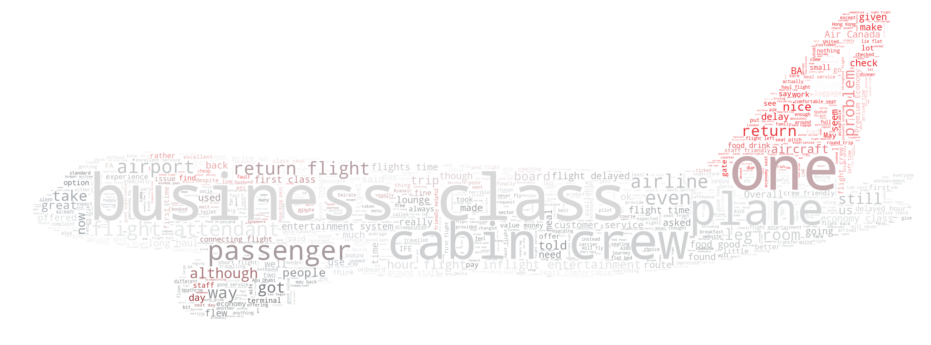

In [32]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get("http://www.pngmart.com/files/7/Modern-Plane-PNG-HD.png")

mask = np.array(Image.open(BytesIO(response.content)))
wordcloud_fra = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[16,16])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


# **Providing Sentiment Value to Each Review According to Rating**

In [0]:
sentiment=[]
for i in airline_data.overall_rating:
  if(i<=5 and i>=0):
    sentiment.append(0)
  else:
    sentiment.append(1)

In [0]:
new_airline_data=airline_data.copy()

In [0]:
new_airline_data['sentiment']=sentiment

In [0]:
### Shuffline the Dataset for Training ###

from sklearn.utils import shuffle
new_airline_data=shuffle(new_airline_data)

# **Logisitc Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
model=LogisticRegression()
vectorizer=CountVectorizer(ngram_range=(1,2))
x_l=vectorizer.fit_transform(new_airline_data.content.values)

In [0]:
model.fit(x_l[:29488],new_airline_data.sentiment[:29488].values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
model.score(x_l[29488:],new_airline_data.sentiment[29488:].values)

0.8871558388715584

In [0]:
y_predict=model.predict(x_l[29488:])

In [0]:
x_axis=[]
n=1
for i in range(0,len(new_airline_data[29488:].values)):
  x_axis.append(n)
  n=n+1

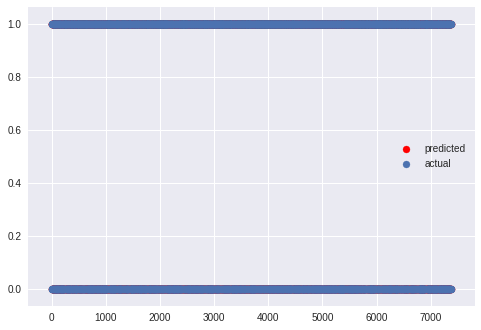

In [0]:
plt.scatter(x_axis,new_airline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict,label='actual')
plt.legend()


# **Linear Support Vector Machine**

In [0]:
from sklearn.svm import LinearSVC

In [0]:
clf = LinearSVC(random_state=42, tol=1e-5)

In [0]:
clf.fit(x_l[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [0]:
clf.score(x_l[29488:],new_airline_data.sentiment[29488:])

0.8795605587956056

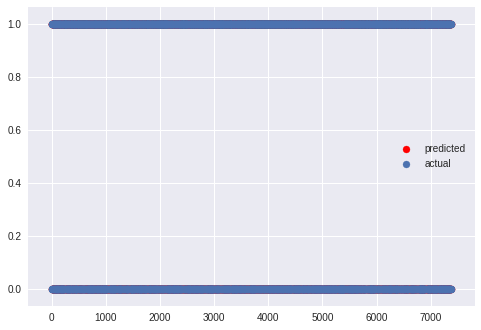

In [0]:
plt.scatter(x_axis,new_airline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict,label='actual')
plt.legend()


# **Preprocessing the Reviews **

In [0]:
t=new_airline_data.copy()

In [0]:
pos_sentiment=[]
neg_sentiment=[]
avg_rating=[]
for i in airline_names:
  tempdf=t[t['airline_name']==i]
  pos=len(tempdf[tempdf['sentiment']==1])
  neg=len(tempdf)-pos
  pos_sentiment.append(pos)
  neg_sentiment.append(neg)
  avg_rate=tempdf.overall_rating.mean()
  avg_rating.append(avg_rate)
clustered_data=pd.DataFrame(list(zip(airline_names,avg_rating,pos_sentiment,neg_sentiment)),columns=['airline_name','average_rating','pos_sentiment','neg_sentiment'])

In [0]:
clustered_data=clustered_data.sort_values(by=['pos_sentiment','average_rating'],kind='mergesort',ascending=False)

In [0]:
clustered_data.head()

,airline_name,average_rating,pos_sentiment,neg_sentiment
97,british-airways,5.881696,511,385
215,lufthansa,6.993333,457,143
255,qantas-airways,7.005172,421,159
138,emirates,6.246377,418,272
257,qatar-airways,7.319106,377,115


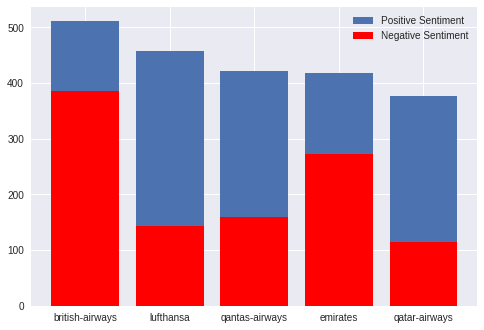

In [0]:
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.pos_sentiment.head(5).values,label='Positive Sentiment')
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.neg_sentiment.head(5).values,label='Negative Sentiment',color='red')
plt.legend()

# **Preprocessing Reviews and Removing Stop Words**


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
stop = set(stopwords.words("english"))

In [0]:
def preprocessing(text):
  le = WordNetLemmatizer()
  words = word_tokenize(text)
  words = [x for x in words if not x in stop]
  words = [le.lemmatize(x) for x in words]
  return " ".join(words)

In [0]:
reviews2 = [preprocessing(x) for x in new_airline_data.content]

In [0]:
new_airline_data['reviews_processed']=reviews2

### **Logisitic Regression on Processed Data**

In [0]:
logic_model=LogisticRegression()
vectorizer_p=CountVectorizer(ngram_range=(1,2))
x_l_1=vectorizer_p.fit_transform(new_airline_data.reviews_processed.values)

In [0]:
logic_model.fit(x_l_1[:29488],new_airline_data.sentiment[:29488].values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
logic_model.score(x_l_1[29488:],new_airline_data.sentiment[29488:].values)

0.8839007188390072

### **Implementing Linear SVM**

In [0]:
clf1 = LinearSVC(random_state=42, tol=1e-5)

In [0]:
clf1.fit(x_l_1[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [0]:
clf1.score(x_l_1[29488:],new_airline_data.sentiment[29488:])

0.8753560287535603

# **Working With Neural Networks**

In [0]:
new_airline_data.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment,reviews_processed
31578,singapore-airlines,/airline-reviews/singapore-airlines,Singapore Airlines customer review,A Turner,Australia,2014-01-09,Flew economy from Frankfurt to Singapore. Food...,NaN,NaN,Economy,...,4.0,5.0,4.0,4.0,NaN,NaN,5.0,1,1,Flew economy Frankfurt Singapore . Food decent...


In [0]:
reviews_array=np.array(new_airline_data.content)

In [0]:
sentiment_array=np.array(new_airline_data.sentiment)

In [0]:
from keras.datasets import imdb
from keras.layers import Dense,Conv1D,MaxPool1D,Embedding,Flatten,Dropout,GRU,LSTM
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
token=Tokenizer()
token.fit_on_texts(reviews_array) 
vocab_size=len(token.word_index) +1
print(vocab_size)

37678


In [0]:
l = 0
for i in reviews_array:
  l += len(i)
  
avg_length = l/len(reviews_array)
review_training = [x[:int(avg_length)] for x in reviews_array]


In [0]:
# encoded = token.texts_to_sequences(reviews_array)
# l = []
# for i in encoded:
#   l.append(len(i))
# print(l/len(encoded))

In [0]:
padded_docs = pad_sequences(encoded, maxlen=38, padding='post')

## **LSTM**

In [0]:
n_model1 = Sequential()
n_model1.add(Embedding(37678,64,input_length=38))
n_model1.add(LSTM(64, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))
n_model1.add(Dropout(0.5))
n_model1.add(LSTM(64,return_sequences=False))
n_model1.add(Dropout(0.5))
n_model1.add(Dense(1,activation="sigmoid"))
n_model1.summary()
n_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 38, 64)            2411392   
_________________________________________________________________
lstm_3 (LSTM)                (None, 38, 64)            33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,477,505
Trainable params: 2,477,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = n_model1.fit(padded_docs,sentiment_array,epochs=5,batch_size=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 29488 samples, validate on 7373 samples
Epoch 1/5
29488/29488 [==============================] - 40s 1ms/step - loss: 0.4716 - acc: 0.7725 - val_loss: 0.4018 - val_acc: 0.8283
Epoch 2/5
29488/29488 [==============================] - 38s 1ms/step - loss: 0.3562 - acc: 0.8549 - val_loss: 0.4038 - val_acc: 0.8204
Epoch 3/5
29488/29488 [==============================] - 37s 1ms/step - loss: 0.2973 - acc: 0.8836 - val_loss: 0.4231 - val_acc: 0.8142
Epoch 4/5
29488/29488 [==============================] - 37s 1ms/step - loss: 0.2439 - acc: 0.9078 - val_loss: 0.4939 - val_acc: 0.8013
Epoch 5/5
29488/29488 [==============================] - 36s 1ms/step - loss: 0.1928 - acc: 0.9301 - val_loss: 0.5099 - val_acc: 0.7991


## **CNN**

In [0]:
n_model2 = Sequential()
n_model2.add(Embedding(37678,100,input_length=38))
n_model2.add(Conv1D(filters=64,kernel_size=3))
n_model2.add(MaxPool1D(pool_size=3))
n_model2.add(Flatten())
n_model2.add(Dense(64,activation="relu"))
n_model2.add(Dropout(rate = 0.2))
n_model2.add(Dense(1,activation="sigmoid"))
n_model2.summary()
adm = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
n_model2.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 38, 100)           3767800   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 36, 64)            19264     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                49216     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total para

In [0]:
hist = n_model2.fit(padded_docs,sentiment_array,epochs=100,batch_size=100,validation_split=0.1)

Train on 33174 samples, validate on 3687 samples
Epoch 1/100
33174/33174 [==============================] - 23s 688us/step - loss: 0.6859 - acc: 0.5677 - val_loss: 0.6800 - val_acc: 0.5837
Epoch 2/100
33174/33174 [==============================] - 22s 654us/step - loss: 0.6750 - acc: 0.5908 - val_loss: 0.6750 - val_acc: 0.5837
Epoch 3/100
33174/33174 [==============================] - 22s 660us/step - loss: 0.6706 - acc: 0.5908 - val_loss: 0.6711 - val_acc: 0.5837
Epoch 4/100
33174/33174 [==============================] - 22s 666us/step - loss: 0.6650 - acc: 0.5908 - val_loss: 0.6655 - val_acc: 0.5837
Epoch 5/100
33174/33174 [==============================] - 22s 650us/step - loss: 0.6575 - acc: 0.5908 - val_loss: 0.6567 - val_acc: 0.5837
Epoch 6/100
33174/33174 [==============================] - 22s 650us/step - loss: 0.6460 - acc: 0.5915 - val_loss: 0.6425 - val_acc: 0.5891
Epoch 7/100
33174/33174 [==============================] - 23s 680us/step - loss: 0.6284 - acc: 0.6121 - val_lo

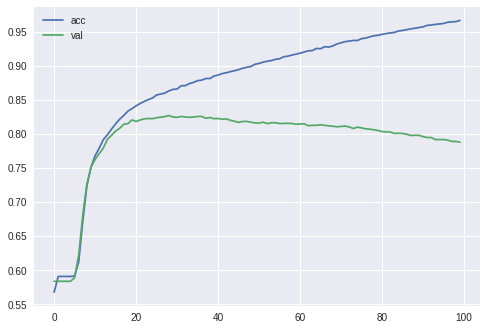

In [0]:
plt.plot(hist.history["acc"],label="acc")
plt.plot(hist.history["val_acc"],label="val")
plt.legend()

In [0]:
model_conv = Sequential()
model_conv.add(Embedding(vocab_size, 100, input_length=38))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPool1D(pool_size=4))
model_conv.add(LSTM(100))
model_conv.add(Dense(1, activation='sigmoid'))
adm = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_conv.compile(loss='binary_crossentropy', optimizer=adm,    metrics=['accuracy'])
model_conv.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 38, 100)           3767800   
_________________________________________________________________
dropout_9 (Dropout)          (None, 38, 100)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 34, 64)            32064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 3,865,965
Trainable params: 3,865,965
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_conv.fit(padded_docs,sentiment_array, validation_split=0.2, epochs = 10)

Train on 29488 samples, validate on 7373 samples
Epoch 1/10
29488/29488 [==============================] - 73s 2ms/step - loss: 0.5655 - acc: 0.6930 - val_loss: 0.4516 - val_acc: 0.7951
Epoch 2/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.4169 - acc: 0.8122 - val_loss: 0.4189 - val_acc: 0.8088
Epoch 3/10
29488/29488 [==============================] - 72s 2ms/step - loss: 0.3694 - acc: 0.8420 - val_loss: 0.4149 - val_acc: 0.8150
Epoch 4/10
29488/29488 [==============================] - 70s 2ms/step - loss: 0.3337 - acc: 0.8600 - val_loss: 0.4201 - val_acc: 0.8107
Epoch 5/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.3034 - acc: 0.8761 - val_loss: 0.4287 - val_acc: 0.8085
Epoch 6/10
29488/29488 [==============================] - 71s 2ms/step - loss: 0.2734 - acc: 0.8903 - val_loss: 0.4478 - val_acc: 0.8056
Epoch 7/10
29488/29488 [==============================] - 70s 2ms/step - loss: 0.2396 - acc: 0.9064 - val_loss: 0.4779 - val_acc: